Kolmogorov-Smirnov Test:
KS Statistic: 0.0525
P-value: 2.1177893278419604e-12

Anderson-Darling Test:
AD Statistic: 46.6870545823982
Critical Values: [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
Significance Levels: 0.001


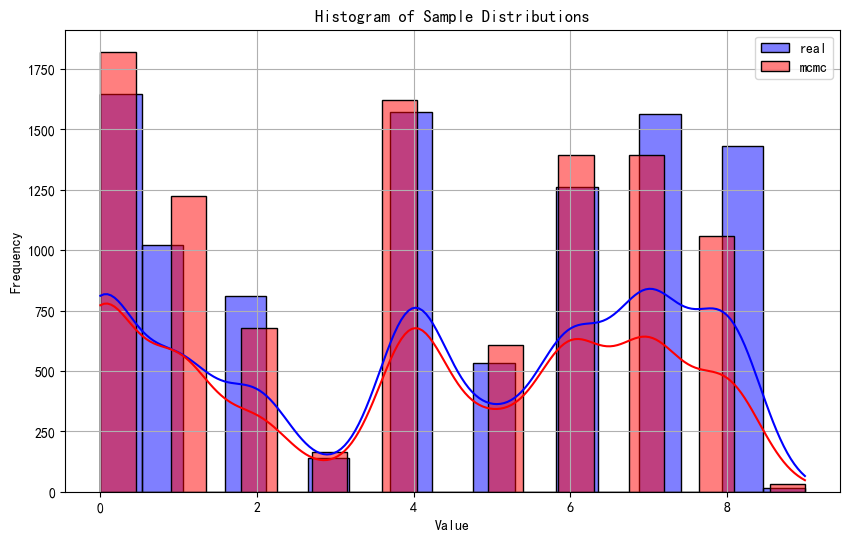

In [1]:
# import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import autograd.numpy as np
from autograd import grad
from scipy.integrate import quad
warnings.filterwarnings("ignore")

def generate_transition_matrix(n):
    # Generate random numbers
    matrix = np.random.rand(n, n)
    # Normalize rows to ensure they sum to 1
    matrix = matrix / matrix.sum(axis=1, keepdims=True)
    matrix = matrix / matrix.sum(axis=0, keepdims=True)
    return matrix


# Example: generate a 3x3 transition matrix
n = 10000
space_num=10
transition_matrix = generate_transition_matrix(space_num)
# p = [0.2, 0.3, 0.5]
# samplespace = [0,1,2]

samplespace = range(space_num)
p = np.random.rand(space_num)
p = p/p.sum()
mcmc_samples = [0]
while len(mcmc_samples)<n:
    u = np.random.rand()
    z = mcmc_samples[-1]
    Q = transition_matrix[z]
    Q = Q/Q.sum()
    z_star = np.random.choice(range(space_num), p=Q)
    # alpha = min(1,p[z_star]*transition_matrix[z_star][z]/(p[z]*transition_matrix[z][z_star]))
    alpha = min(1,p[z_star]/p[z])
    if u > alpha:
        z_star = z
    mcmc_samples.append(z_star)
samples = np.random.choice(samplespace, size=n, p=p)

# 使用 Kolmogorov-Smirnov 检验
ks_statistic, ks_p_value = stats.ks_2samp(samples, mcmc_samples)
print("Kolmogorov-Smirnov Test:")
print("KS Statistic:", ks_statistic)
print("P-value:", ks_p_value)

# 使用 Anderson-Darling 检验
ad_statistic, ad_critical_values, ad_significance_levels = stats.anderson_ksamp([samples, mcmc_samples])
print("\nAnderson-Darling Test:")
print("AD Statistic:", ad_statistic)
print("Critical Values:", ad_critical_values)
print("Significance Levels:", ad_significance_levels)

# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(samples, color='blue', alpha=0.5, label='real', kde=True)
sns.histplot(mcmc_samples, color='red', alpha=0.5, label='mcmc', kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Distributions')
plt.legend()
plt.grid(True)
plt.show()

Expectation of Target Distribution: -1.0161379046926386
Mean of Metropolis-Hastings Sampling: -0.8845359504623992


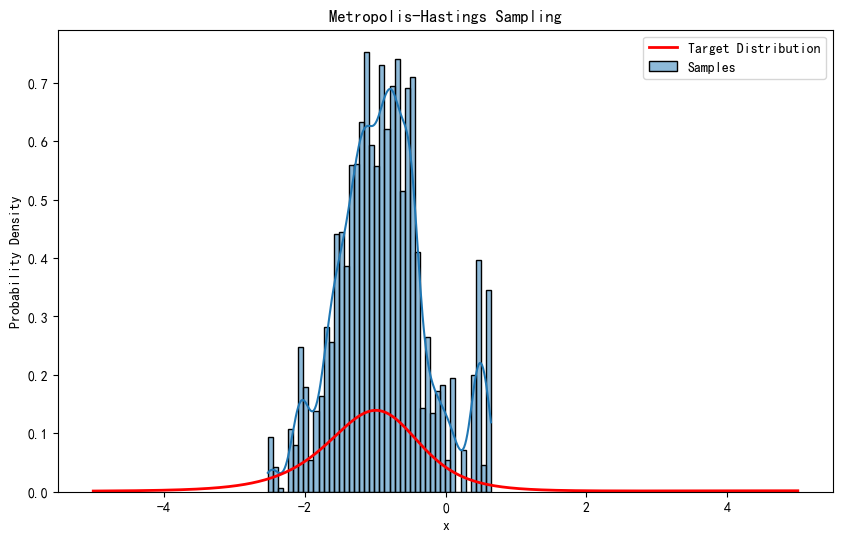

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def f(x):
    return sigmoid(3*sigmoid(2*x+1)+2*sigmoid(0.4*x-3)+1)

def target_distribution(x):
    g = grad(f)
    return g(1.0*x)


# def proposal_distribution(x, scale):
#     return np.random.laplace(loc=x, scale=scale)
# def proposal_distribution(x, scale):
#     return np.random.gamma(2, 1)

# Metropolis-Hastings算法
def metropolis_hastings(target_distribution, proposal_distribution, n_samples, initial_value, sigma):
    samples = [initial_value]
    current_value = initial_value
    
    for _ in range(n_samples):
        proposed_value = proposal_distribution(current_value, sigma)
        acceptance_prob = min(1, target_distribution(proposed_value) / (1+target_distribution(current_value)))
        if np.random.uniform(0, 1) < acceptance_prob:
            current_value = proposed_value
        samples.append(current_value)
    return samples

def expectation_pdf(x,pdf):
    return pdf(x)*x



def process(target_distribution,proposal_distribution, n_samples, initial_value, sigma):
    # 运行Metropolis-Hastings算法
    samples = metropolis_hastings(target_distribution, proposal_distribution, n_samples, initial_value, sigma)
    print("Expectation of Target Distribution:", quad(expectation_pdf, -5, 5, args=(target_distribution,))[0]/quad(target_distribution, -5, 5)[0])
    print("Mean of Metropolis-Hastings Sampling:", np.mean(samples))
    # 绘制结果
    plt.figure(figsize=(10, 6))
    # plt.hist(samples, bins=50, density=True, alpha=0.5, label='Samples')
    sns.histplot(samples, alpha=0.5, label='Samples', kde=True,stat='density')
    x_values = np.linspace(-5, 5, 1000)
    sns.lineplot(x=x_values, y=[target_distribution(x) for x in x_values], color='red', linewidth=2, label='Target Distribution')
    plt.title('Metropolis-Hastings Sampling')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()
    

def uniform(x, width):
    return np.random.uniform(x - width / 2, x + width / 2)
    
# 设置参数
n_samples = 10000  # 抽样次数
initial_value = 0  # 初始值
sigma = 1  # 提议分布的标准差
process(target_distribution,uniform, n_samples, initial_value, sigma)

Expectation of Target Distribution: -1.0161379046926386
Mean of Metropolis-Hastings Sampling: -1.0908774622930053


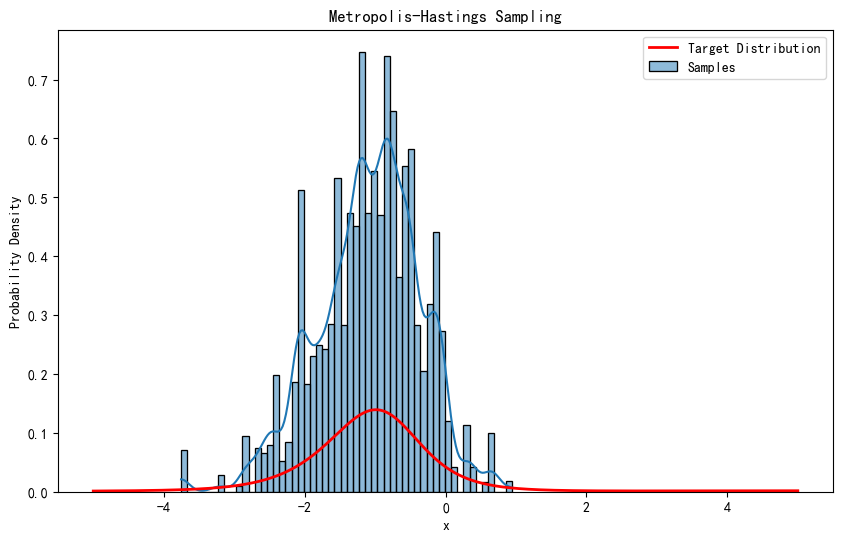

In [3]:
def laplace(x, scale):
    return np.random.laplace(loc=x, scale=scale)

process(target_distribution,laplace, n_samples, initial_value, sigma)

Expectation of Target Distribution: -1.0161379046926386
Mean of Metropolis-Hastings Sampling: -1.0666227888998525


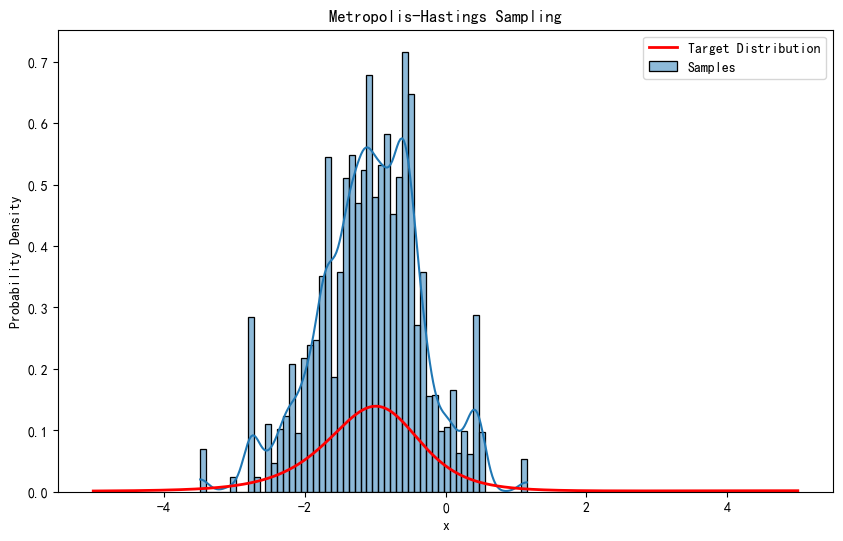

In [4]:
def normal(x, scale):
    return np.random.normal(loc=x, scale=scale)

process(target_distribution,normal, n_samples, initial_value, sigma)

Expectation of Target Distribution: 0.5000000000000001
Mean of Metropolis-Hastings Sampling: 0.5024808223677181


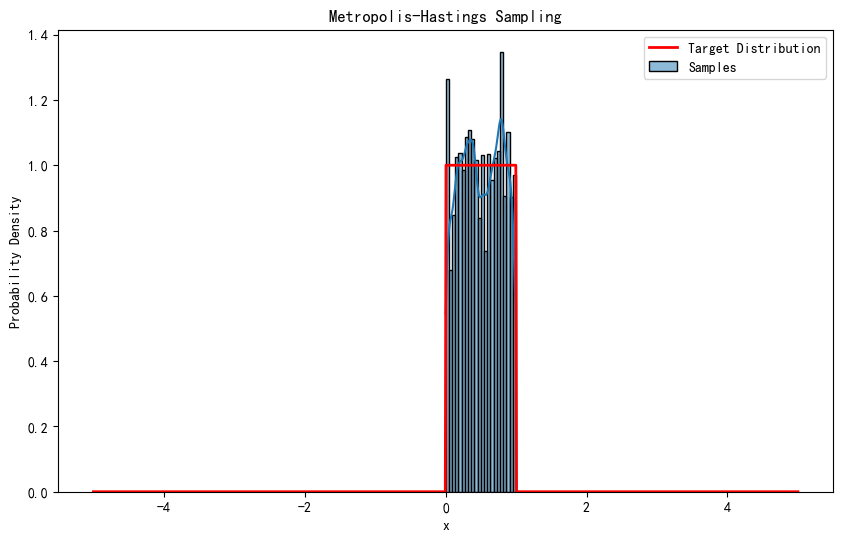

In [5]:
def target_uniform(x):
    return stats.uniform.pdf(x, 0, 1)

process(target_uniform,normal, n_samples, initial_value, sigma)

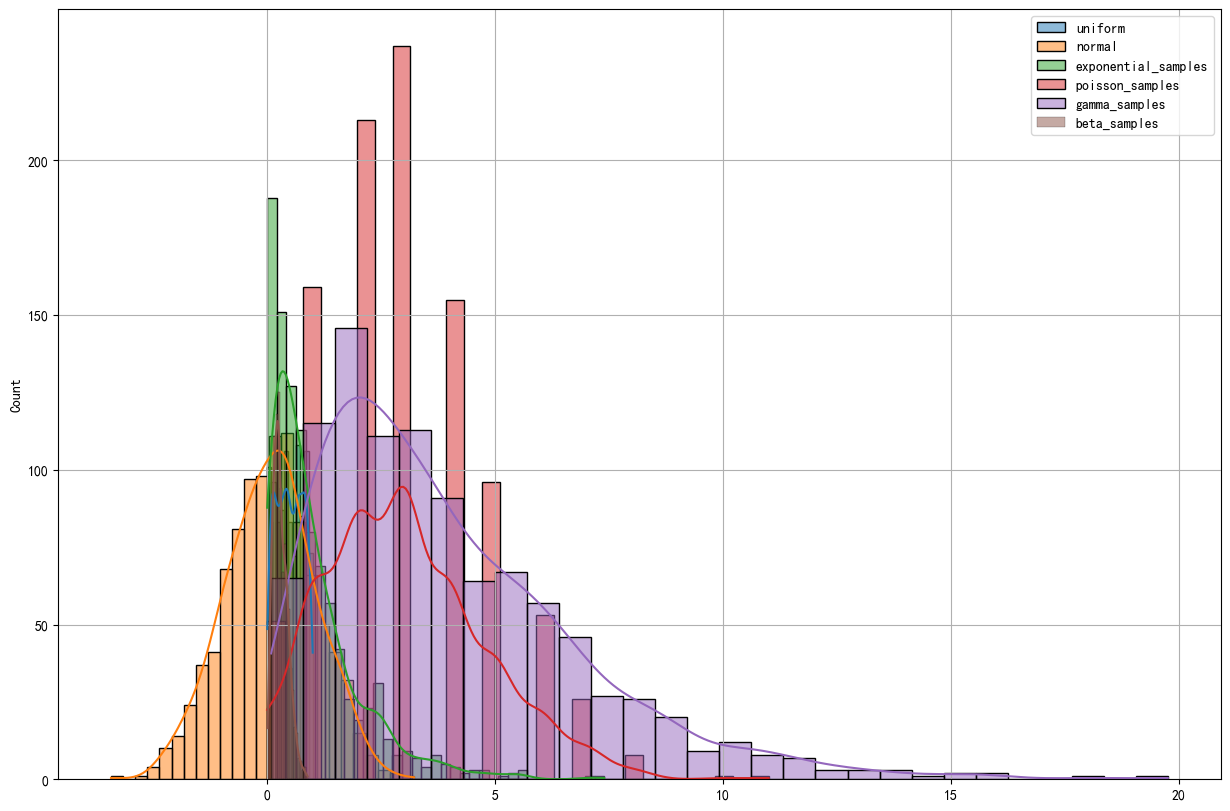

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 抽样均匀分布
uniform_samples = np.random.uniform(low=0, high=1, size=1000)

# 抽样正态分布
normal_samples = np.random.normal(loc=0, scale=1, size=1000)

# 抽样指数分布
exponential_samples = np.random.exponential(scale=1, size=1000)

# 抽样泊松分布
poisson_samples = np.random.poisson(lam=3, size=1000)

# 抽样伽马分布
gamma_samples = np.random.gamma(shape=2, scale=2, size=1000)

# 抽样β分布
beta_samples = np.random.beta(a=2, b=5, size=1000)

# 绘制结果
plt.figure(figsize=(15, 10))
sns.histplot(uniform_samples, alpha=0.5, label='uniform', kde=True)
sns.histplot(normal_samples, alpha=0.5, label='normal', kde=True)
sns.histplot(exponential_samples, alpha=0.5, label='exponential_samples', kde=True)
sns.histplot(poisson_samples, alpha=0.5, label='poisson_samples', kde=True)
sns.histplot(gamma_samples, alpha=0.5, label='gamma_samples', kde=True)
sns.histplot(beta_samples, alpha=0.5, label='beta_samples', kde=True)
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Import sympy library
import sympy as sp

# Define a symbolic variable x
x = sp.Symbol('x')

# Define a function f(x) to be differentiated
f = sp.sin(x) + sp.exp(x)

# Use the diff function to calculate the derivative of f(x) with respect to x
f_prime = sp.diff(f, x)
print(f)
# Print the derivative function
print(f_prime)

# Simplify the derivative function
# f_prime_simplified = sp.simplify(f_prime)

# # Print the simplified derivative function
# print(f_prime_simplified)


exp(x) + sin(x)
exp(x) + cos(x)
